# PyTorch Computer Vision

## 0. Computer Vision libraries in PyTorch

* `torchvision` - a library that provides a collection of models and datasets for computer vision.
* `torchvision.datasets` - get datasets and data loading functions for computer vision.
* `torchvision.models` - get models for image classification, segmentation, object detection, etc.
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model.
* `torchvision.utils.data.Dataset` - Base dataset class for PyTorch.
* `torchvision.utils.data.DataLoader` - Combines a dataset and a sampler, and provides an iterable over the given dataset.

In [1]:
# import PyTorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(f"PyTorch Version: {torch.__version__}")
print(f"Torchvision Version: {torchvision.__version__}")

PyTorch Version: 2.3.1
Torchvision Version: 0.18.1


## 1. Getting a dataset

The dataset we'll be using is FashionMNIST from `torchvision.datasets`.

In [2]:
# Setup training data
training_data = datasets.FashionMNIST(
    root="data",    # where to download data to?
    train=True,     # do we want the training dataset?
    download=True,      # should we download the data yes/no?
    transform=torchvision.transforms.ToTensor(),        # how do we want to transform the data?
    target_transform=None       # how do we want to transform the labels/target?
)

# Setup test data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [3]:
len(training_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image, label = training_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_name =training_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = training_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
training_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 Check input and output shapes of data

In [8]:
# Check the shape or our first image
print(f"Image shape: {image.shape} -> [Color channel, Height, Width]")
print(f"Label: {label} -> {class_name[label]}")

Image shape: torch.Size([1, 28, 28]) -> [Color channel, Height, Width]
Label: 9 -> Ankle boot


### 1.2 Visualize the data

Image shape: torch.Size([1, 28, 28])


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

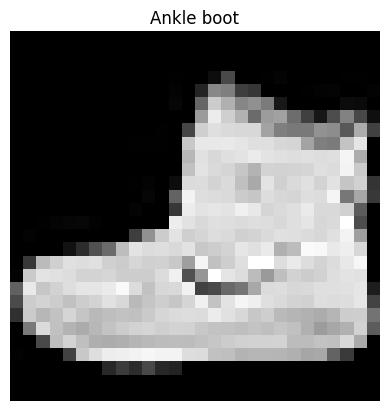

In [9]:
import matplotlib.pyplot as plt
image, label = training_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_name[label])
plt.axis("off")

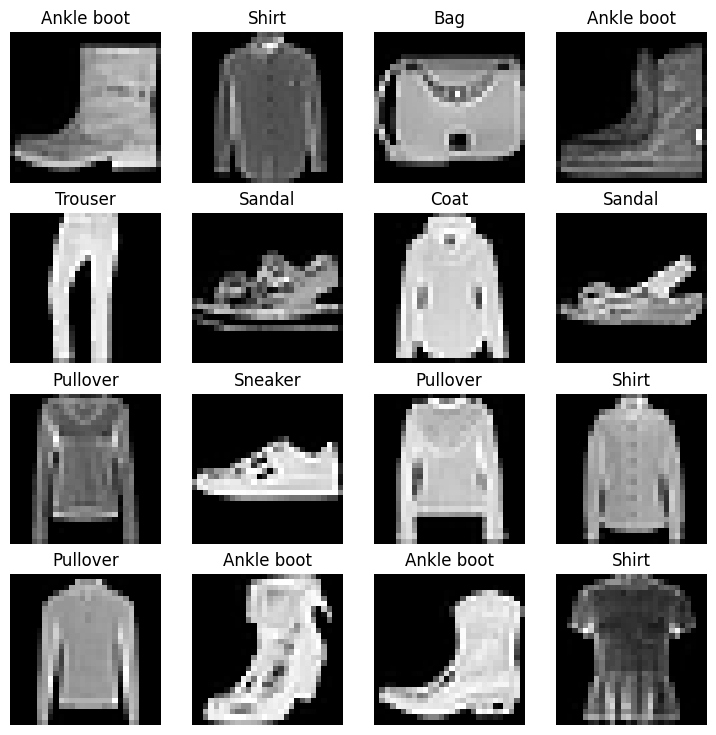

In [10]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
row, col = 4, 4
for i in range(1, row*col+1):
    random_idx = torch.randint(0, len(training_data), size=[1]).item()
    img, label = training_data[random_idx]
    fig.add_subplot(row, col, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_name[label])
    plt.axis("off")


## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Dataset.

DataLoader turns our dataset into a Python iterable.

More specifically, it allows us to iterate over our data in batches.

Why would we do this?

1. It is more computationally efficient to pass data in batches.
2. It gives our neural network more chances to update it's gradients per epoch.

In [11]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)

train_dataloader = DataLoader(
    dataset=training_data, batch_size=BATCH_SIZE, shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data, batch_size=BATCH_SIZE, shuffle=False
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x12ea2f8c0>,
 <torch.utils.data.dataloader.DataLoader at 0x12ed0e600>)

In [12]:
# Checkout what we've created
print(f"DalaLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DalaLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x12ea2f8c0>, <torch.utils.data.dataloader.DataLoader object at 0x12ed0e600>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [13]:
# Check whats inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8, label size torch.Size([])


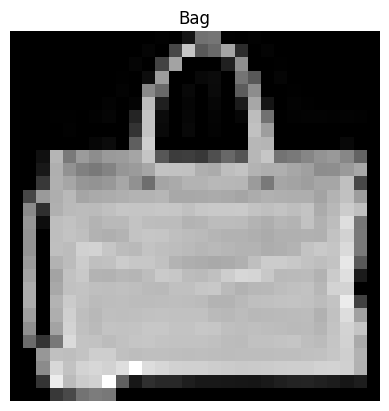

In [14]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_name[label.item()])
plt.axis("off")
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size {label.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiements.

In other words: start simple and get more complex as needed.

In [15]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happend
print(f"Original shape: {x.shape} -> [Color channel, Height, Width]")
print(f"Flattened shape: {output.shape} -> [Color channel, Height * Width]")

Original shape: torch.Size([1, 28, 28]) -> [Color channel, Height, Width]
Flattened shape: torch.Size([1, 784]) -> [Color channel, Height * Width]


In [16]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)
        

In [17]:
torch.manual_seed(42)
# Setup the model
model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=128,
    output_shape=len(class_name) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [18]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)


tensor([[-0.2292, -0.3081, -0.4636,  0.0714, -0.2627, -0.0312,  0.0321, -0.1599,
          0.1276,  0.1425]], grad_fn=<AddmmBackward0>)

## 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working on a classification problem, we'll use `nn.CrossEntropyLoss`.
* Optimizer - we'll use the Adam optimizer.
* Evaluation metrics - we'll use accuracy as our evaluation metric.

In [19]:
import requests
from pathlib import Path

# Download the helper function form Learn Pytorch repo (if it's not already downlaoded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already downloaded")
else:
    print("Downloading helper_functions.py...")
    url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"

    r = requests.get(url)
    with open("helper_functions.py", "wb") as f:
        f.write(r.content)

helper_functions.py already downloaded


In [20]:
# Import the accuracy function
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuraxy values etc).
2. How fast it runs.

In [21]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    """Prints difference between start and end time in a nice format"""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [22]:
start_time = timer()
end_time = timer()
print_train_time(start_time, end_time, device="cpu")



Train time on cpu: 0.000 seconds


2.8792001103283837e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through the data in batches, perform training steps, calculate the train loss **per batch**.
3. Loop through testing batches, perform testing steps, calculate the test loss **per batch**.
4. Print out what's happening.
5. Time it all (for fun).

In [23]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_start_time = timer()

# Set the number of epochs
EPOCHS = 3

# Create training and test loop
for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch {epoch}\n-------------------------------")
    ### Training
    train_loss = 0

    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()   # accumulate train loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Backward pass
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out what's happening every 400 steps
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")
    # Calculate the average training loss
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X_test)

            # 2. Calculate loss
            test_loss += loss_fn(test_pred, y_test).item()

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        # Calculate the average test loss and accuracy
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    
    # Print out the information
    print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

# Calculate the total training time
train_end_time = timer()
total_train_time_model_0 = print_train_time(train_start_time, train_end_time, device=next(model_0.parameters()).device)
print(f"Total training time: {total_train_time_model_0:.2f} seconds")
            





/Users/okanhollander/Github/DeepLearning_PyTorch/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
-------------------------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 33%|███▎      | 1/3 [00:01<00:03,  1.72s/it]

Epoch 0, Train Loss: 0.5781, Test Loss: 0.5011, Test Accuracy: 82.4780
Epoch 1
-------------------------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 67%|██████▋   | 2/3 [00:03<00:01,  1.70s/it]

Epoch 1, Train Loss: 0.4745, Test Loss: 0.4828, Test Accuracy: 82.9273
Epoch 2
-------------------------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


100%|██████████| 3/3 [00:05<00:00,  1.71s/it]

Epoch 2, Train Loss: 0.4541, Test Loss: 0.4772, Test Accuracy: 83.4964
Train time on cpu: 5.134 seconds
Total training time: 5.13 seconds


## 4. Make predictions and get Model 0 Results

In [24]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary of the loss and accuracy of a model on a given dataset"""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # 1. Forward pass
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale the loss and acc values by the number of batches
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_accuracy": acc
    }

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

100%|██████████| 313/313 [00:00<00:00, 1652.74it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47719860076904297,
 'model_accuracy': 83.49640575079871}

## 5. Setup device agnostic-code (training on GPU)

In [25]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6. Model 1: Building a better model with non-linear activations

We learned about the power of non-linear activations in the previous notebook.

In [26]:
# Create a model with non-linear activations
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            # nn.ReLU()
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [27]:
# Create an instance of the model
model_1 = FashionMNISTModelV1(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_name)
).to(device)

model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 6.1 Setup loss, optimizer and evaluation metrics

In [28]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)


### 6.2 Functionize our training loop

Let's create a function for:
* training loop - `train_step()`
* validation loop - `test_step()`

In [29]:
def train_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    optimizer: torch.optim.Optimizer,
    device: torch.device = "cpu",
):
    """Performs a single training step"""
    train_loss, train_acc = 0.0, 0.0  # Initialize loss and accuracy
    # Put model in training mode
    model.train()

    for batch, (X, y) in enumerate(data_loader):
        # Move data to device
        X, y = X.to(device), y.to(device)

        # Forward pass (Outputs raw logits from the model)
        y_pred = model(X)

        # Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        train_acc += accuracy_fn(
            y_true=y, y_pred=y_pred.argmax(dim=1)
        )  # go from logits to class prediction

        # Zero the gradients
        optimizer.zero_grad()

        # Backward pass
        loss.backward()

        # Optimizer step
        optimizer.step()

    # Calculate the average loss and accuracy
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train Loss: {train_loss:.5f}, Train Accuracy: {train_acc:.2f}")

    return train_loss, train_acc  # Return the loss and accuracy


In [30]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = "cpu"):
    """Performs a single test step"""
    # Put model in evaluation mode
    model.eval()

    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for X, y in data_loader:
            # Move data to device
            X, y = X.to(device), y.to(device)

            # Forward pass
            y_pred = model(X)

            # Calculate loss
            loss = loss_fn(y_pred, y)
            test_loss += loss.item()

            # Calculate accuracy
            test_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Calculate the average loss and accuracy
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}")
        return test_loss, test_acc

In [31]:
from timeit import default_timer as timer
from tqdm import tqdm  # Make sure to import tqdm

torch.manual_seed(42)

# Measure time
train_start_time = timer()

# Set the number of epochs
EPOCHS = 3

# Create a training and test loop
for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch {epoch}\n-------------------------------")
    ### Training
    train_loss, train_acc = train_step(
        model=model_1,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        optimizer=optimizer,
        device=device,
    )

    ### Testing
    test_loss, test_acc = test_step(
        model=model_1,
        data_loader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device,
    )

    print(f"Epoch {epoch} Training Loss: {train_loss:.5f}, Training Accuracy: {train_acc:.2f}")
    print(f"Epoch {epoch} Testing Loss: {test_loss:.5f}, Testing Accuracy: {test_acc:.2f}\n")

train_time_end = timer()
total_train_time_model_1 = print_train_time(train_start_time, train_time_end, device=device)
print(f"Total training time: {total_train_time_model_1:.2f} seconds")


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
-------------------------------


 33%|███▎      | 1/3 [00:01<00:03,  1.61s/it]

Train Loss: 0.62518, Train Accuracy: 77.49
Test Loss: 0.58734, Test Accuracy: 79.44
Epoch 0 Training Loss: 0.62518, Training Accuracy: 77.49
Epoch 0 Testing Loss: 0.58734, Testing Accuracy: 79.44

Epoch 1
-------------------------------


 67%|██████▋   | 2/3 [00:03<00:01,  1.61s/it]

Train Loss: 0.46817, Train Accuracy: 83.29
Test Loss: 0.46961, Test Accuracy: 83.09
Epoch 1 Training Loss: 0.46817, Training Accuracy: 83.29
Epoch 1 Testing Loss: 0.46961, Testing Accuracy: 83.09

Epoch 2
-------------------------------


100%|██████████| 3/3 [00:04<00:00,  1.61s/it]

Train Loss: 0.43819, Train Accuracy: 84.35
Test Loss: 0.45408, Test Accuracy: 83.71
Epoch 2 Training Loss: 0.43819, Training Accuracy: 84.35
Epoch 2 Testing Loss: 0.45408, Testing Accuracy: 83.71

Train time on cpu: 4.819 seconds
Total training time: 4.82 seconds


In [32]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

100%|██████████| 313/313 [00:00<00:00, 1785.43it/s]


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.45408448576927185,
 'model_accuracy': 83.70607028753993}

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known as ConvNets.  
CNN's are known for their capabilities to find patterns in visual data.  

To find out what's happening inside a CNN, see this website: https://poloclub.github.io/cnn-explainer/

In [33]:
import torch
from torch import nn

# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG
    model from CNN explainer website.
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            # Create a conv layer
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),   # Values we can set ourself in our NN's are called hyperparameters
            # Create a ReLU activation
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7, out_features=output_shape),
            )
        
    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f"Conv block 1 shape: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Conv block 2 shape: {x.shape}")
        x = self.classifier(x)
        # print(f"Output shape: {x.shape}")
        return x

In [34]:
torch.manual_seed(42)
# Create an instance of the model
model_2 = FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_name)
).to(device)

model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

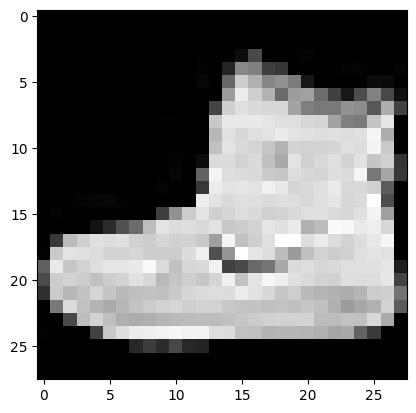

In [35]:
plt.imshow(image.squeeze(), cmap="gray")

In [36]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [37]:
# Pass image through model
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`

In [38]:
torch.manual_seed(42)

# Create a batch of images
images = torch.rand(size=(32, 3, 28, 28))
test_image = images[0]

print(f"Image shape: {images.shape}")
print(f"Test image shape: {test_image.shape}")
print(f"Test image: {test_image}")

Image shape: torch.Size([32, 3, 28, 28])
Test image shape: torch.Size([3, 28, 28])
Test image: tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.2695, 0.3588, 0.1994],
         [0.5472, 0.0062, 0.9516,  ..., 0.9103, 0.6440, 0.7071],
         [0.6581, 0.4913, 0.8913,  ..., 0.1591, 0.7653, 0.2979],
         ...,
         [0.8029, 0.2662, 0.2614,  ..., 0.6683, 0.6779, 0.0837],
         [0.0150, 0.2406, 0.8423,  ..., 0.4931, 0.9576, 0.1999],
         [0.5039, 0.7378, 0.1548,  ..., 0.3018, 0.6301, 0.6886]],

        [[0.2366, 0.0042, 0.7617,  ..., 0.1946, 0.2539, 0.5961],
         [0.6356, 0.6922, 0.7744,  ..., 0.4583, 0.6079, 0.2258],
         [0.6442, 0.0118, 0.1422,  ..., 0.9184, 0.8874, 0.6511],
         ...,
         [0.3880, 0.3186, 0.6964,  ..., 0.6831, 0.2704, 0.9291],
         [0.7386, 0.8284, 0.5660,  ..., 0.3465, 0.2419, 0.3392],
         [0.3217, 0.9783, 0.6918,  ..., 0.3515, 0.4982, 0.6605]],

        [[0.4890, 0.5231, 0.5633,  ..., 0.1664, 0.6741, 0.2001],
         [0.3426, 0.2617, 0.

In [39]:
# Create a single Conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)

# Pass the data through the conv layer
conv_output = conv_layer(test_image)
conv_output

tensor([[[-0.1357,  0.0867,  0.0296,  ..., -0.0134, -0.1482, -0.1817],
         [ 0.1291,  0.0120, -0.1034,  ..., -0.2380, -0.1247, -0.1516],
         [-0.2422, -0.0499, -0.1807,  ...,  0.0579, -0.1175, -0.3238],
         ...,
         [ 0.0087,  0.1066,  0.0285,  ..., -0.1727,  0.1096, -0.0944],
         [ 0.1125, -0.3197, -0.3739,  ..., -0.0707, -0.1504, -0.0185],
         [ 0.0911,  0.1958,  0.2444,  ...,  0.4607,  0.2147,  0.1627]],

        [[ 0.1054, -0.2039, -0.2032,  ..., -0.0953, -0.2286, -0.0809],
         [ 0.1575, -0.3953,  0.0143,  ...,  0.0468, -0.0550,  0.0894],
         [-0.1254, -0.1173,  0.1332,  ..., -0.3112,  0.0972, -0.0322],
         ...,
         [-0.0085, -0.2944, -0.0739,  ..., -0.1538,  0.0097, -0.2807],
         [-0.2294,  0.0592, -0.1005,  ..., -0.0483, -0.1705,  0.0064],
         [-0.2297,  0.0579, -0.2964,  ...,  0.1868,  0.0893,  0.0565]],

        [[-0.0435,  0.0923,  0.0497,  ...,  0.2650,  0.1496,  0.2299],
         [-0.1375,  0.0154, -0.0056,  ...,  0

### 7.2 Stepping through `nn.MaxPool2d()`

In [40]:
# Print out the original image shape without unsqueezed dimension
print(f"Original image shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(0))
print(f"Conv layer output shape: {test_image_through_conv.shape}")

# Pass the conv_layer output through the max_pool_layer
max_pool_output = max_pool_layer(test_image_through_conv)
print(f"Max pool output shape: {max_pool_output.shape}")

Original image shape: torch.Size([3, 28, 28])
Test image with unsqueezed dimension: torch.Size([1, 3, 28, 28])
Conv layer output shape: torch.Size([1, 10, 28, 28])
Max pool output shape: torch.Size([1, 10, 14, 14])


In [41]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our model's input
random_tensor = torch.randn(size=(1, 1, 2, 2))

# Create a maxpool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the maxpool layer
max_pool_output = max_pool_layer(random_tensor)
print(f"\nMax Pool tensor: {max_pool_output}")
print(f"Max Pool tensor shape: {max_pool_output.shape}")
print(f"Random tensor: {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")
random_tensor


Max Pool tensor: tensor([[[[0.3367]]]])
Max Pool tensor shape: torch.Size([1, 1, 1, 1])
Random tensor: tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])


tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

### 7.3 Setup a loss function and optimizer

In [42]:
# Setup loss function and optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [43]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_start_time = timer()

# Set the number of epochs
EPOCHS = 3

# Create a training and test loop
for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch {epoch}\n-------------------------------")
    ### Training
    train_loss, train_acc = train_step(
        model=model_2,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        optimizer=optimizer,
        device=device,
    )

    ### Testing
    test_loss, test_acc = test_step(
        model=model_2,
        data_loader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device,
    )
end_time = timer()
total_train_time_model_2 = print_train_time(train_start_time, end_time, device=device)

print(f"Epoch {epoch} Training Loss: {train_loss:.5f}, Training Accuracy: {train_acc:.2f}")
print(f"Epoch {epoch} Testing Loss: {test_loss:.5f}, Testing Accuracy: {test_acc:.2f}\n")
print(f"Total training time: {total_train_time_model_2:.2f} seconds")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
-------------------------------
Train Loss: 0.58722, Train Accuracy: 78.69


 33%|███▎      | 1/3 [00:21<00:43, 21.78s/it]

Test Loss: 0.39549, Test Accuracy: 85.87
Epoch 1
-------------------------------
Train Loss: 0.36160, Train Accuracy: 86.96


 67%|██████▋   | 2/3 [00:45<00:23, 23.18s/it]

Test Loss: 0.35000, Test Accuracy: 87.13
Epoch 2
-------------------------------
Train Loss: 0.32213, Train Accuracy: 88.33


100%|██████████| 3/3 [01:07<00:00, 22.47s/it]

Test Loss: 0.32020, Test Accuracy: 88.37
Train time on cpu: 67.403 seconds
Epoch 2 Training Loss: 0.32213, Training Accuracy: 88.33
Epoch 2 Testing Loss: 0.32020, Testing Accuracy: 88.37

Total training time: 67.40 seconds


In [44]:
# Get model_2 results dictionary
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_2_results

100%|██████████| 313/313 [00:00<00:00, 383.01it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3202039897441864,
 'model_accuracy': 88.36861022364218}

## 8. Compare model results and training time

In [45]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_accuracy
0,FashionMNISTModelV0,0.477199,83.496406
1,FashionMNISTModelV1,0.454084,83.706070
2,FashionMNISTModelV2,0.320204,88.368610


In [46]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_results

,model_name,model_loss,model_accuracy,training_time
0,FashionMNISTModelV0,0.477199,83.496406,5.133868
1,FashionMNISTModelV1,0.454084,83.706070,4.819078
2,FashionMNISTModelV2,0.320204,88.368610,67.403377


Text(0, 0.5, 'model')

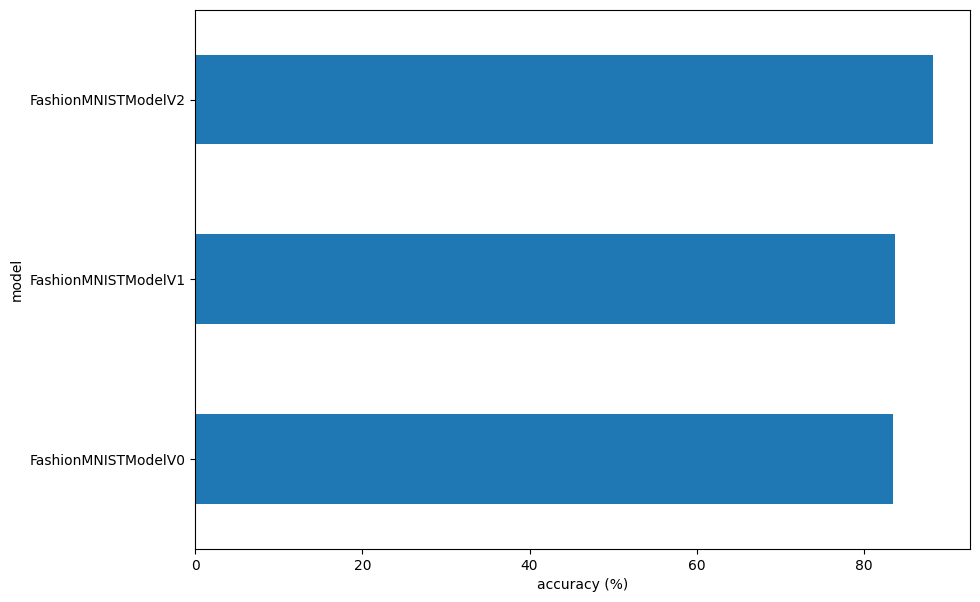

In [49]:
# Visualize the results
import matplotlib.pyplot as plt

compare_results.set_index("model_name")["model_accuracy"].plot(kind="barh", figsize=(10, 7))
plt.xlabel("accuracy (%)")
plt.ylabel("model")


# 9. Make and evaluate random predictions with best model

In [105]:
import torch
import numpy as np

def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass
            pred_logit = model(sample)

            # Convert logits to probabilities
            pred_prob = torch.softmax(pred_logit, dim=1)

            # Get pred_prob off the GPU for further processing
            pred_prob = pred_prob.cpu().detach().numpy()

            # Append the prediction probability to the list
            pred_probs.append(pred_prob)

    # Convert the list of numpy arrays to a single numpy array
    pred_probs = np.array(pred_probs)

    # Convert the numpy array to a tensor
    return torch.tensor(pred_probs)

In [112]:
import random

# random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'True label: Ankle boot')

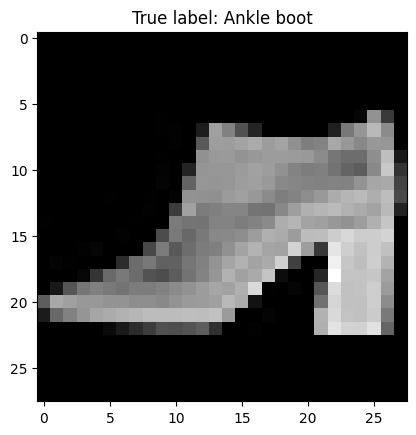

In [113]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(f"True label: {class_name[test_labels[0]]}")

In [114]:
# Make predictions
pred_probs = make_predictions(model=model_2, data=test_samples)

# View the first two predictions and their probabilities
pred_probs[:2]

tensor([[[7.8413e-06, 6.0690e-06, 1.5392e-06, 2.0751e-06, 1.5791e-06,
          1.1328e-02, 7.5432e-06, 2.2541e-04, 5.2014e-04, 9.8790e-01]],

        [[8.3952e-06, 8.5144e-06, 6.0582e-04, 4.7234e-07, 9.9541e-01,
          7.6580e-07, 3.9353e-03, 7.5798e-08, 2.4098e-05, 1.5395e-06]]])

In [115]:
test_labels

[9, 4, 2, 9, 7, 6, 4, 0, 5]

In [116]:
# convert prediciton probabilities to predicted labels
pred_labels = pred_probs.argmax(axis=2).squeeze()
pred_labels

tensor([9, 4, 2, 9, 7, 0, 4, 0, 5])

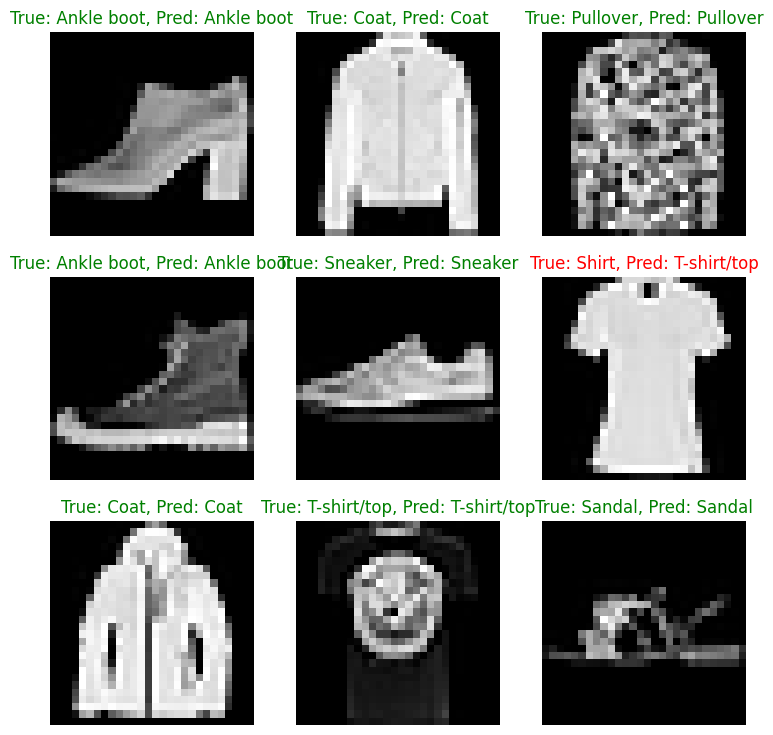

In [117]:
import matplotlib.pyplot as plt

# Plot the first 9 samples and their predictions
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, ax in enumerate(axes.flat):
    ax.imshow(test_samples[i].squeeze(), cmap="gray")
    true_label = class_name[test_labels[i]]
    pred_label = class_name[pred_labels[i]]
    color = "green" if true_label == pred_label else "red"
    ax.set_title(f"True: {true_label}, Pred: {pred_label}", color=color)
    ax.axis("off")
plt.show()
